In [1]:
import pandas as pd
from pandas import CategoricalDtype
import plotly.express as px
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, decomposition, metrics

mpl.rcParams["figure.figsize"] = (14, 7)
mpl.rcParams["figure.dpi"] = 140

In [2]:
df = pd.read_csv("data/to_analysis_v2.csv")
df_estados_regioes = pd.read_csv(
    "data/estados_regioes.csv"
)  # de-para das regiões brasileiras utilizado mais abaixo da análise

In [3]:
df.columns

Index(['contrato_id', 'total_success_dsp5', 'total_success_dsp10',
       'total_success_dsp15', 'total_success_dsp30', 'total_success_dsp60',
       'total_success_dsp90', 'prop_success_dsp5', 'prop_success_dsp10',
       'prop_success_dsp15', 'prop_success_dsp30', 'prop_success_dsp60',
       'prop_success_dsp90', 'total_success_dspp15', 'total_success_dspp30',
       'total_success_dspp45', 'prop_success_dspp15', 'prop_success_dspp30',
       'prop_success_dspp45', 'score_dsp', 'score_dspp', 'mean_dsp_contrato',
       'mean_dspp_contrato', 'vlr_saldo_devedor_esperado', 'nr_documento',
       'tipo_empresa', 'cidade', 'estado', 'subsegmento', 'segmento',
       '('qtd_transacoes', 'mean')', '('qtd_transacoes', 'min')',
       '('qtd_transacoes', 'max')', '('qtd_transacoes', 'median')',
       '('qtd_transacoes', 'sum')', '('vlr_tpv', 'mean')',
       '('vlr_tpv', 'min')', '('vlr_tpv', 'max')', '('vlr_tpv', 'median')',
       '('vlr_tpv', 'sum')'],
      dtype='object')

# Scores vs Segmento e Subsegmento (DSP e DSPP)

In [4]:
segmentos = [
    "Alimentação",
    "Varejo",
    "Bens duráveis",
    "Serviços recorrentes",
    "Viagens e entretenimento",
    "Serviços",
    "Supermercado/Farmácia",
    "Posto",
    "Outros",
]
subsegmentos = [
    "Academias",
    "Alimentação Rápida",
    "Atacadista de Alimento",
    "Atacadistas Gerais",
    "Automotivo",
    "Bares e Restaurantes",
    "Educação",
    "Lazer & Turismo",
    "Lojas Diversas",
    "Material de Construção",
    "None",
    "Outros",
    "Postos de Gasolina",
    "Saúde",
    "Supermercados",
    "Vestuário",
]

In [5]:
# intially by the dsp
df_filtered = df[["nr_documento", "score_dsp", "segmento"]][
    (df["segmento"].isin(segmentos)) & (df["subsegmento"].isin(subsegmentos))
]

In [6]:
fig = px.box(df_filtered, x="segmento", y="score_dsp")
fig.show()

In [7]:
# intially by the dsp
df_filtered = df[["nr_documento", "score_dsp", "subsegmento"]][
    (df["segmento"].isin(segmentos)) & (df["subsegmento"].isin(subsegmentos))
]

fig = px.box(df_filtered, x="subsegmento", y="score_dsp")
fig.show()

In [8]:
# intially by the dsp
df_filtered = df[
    [
        "nr_documento",
        "score_dspp",
        "segmento",
        "subsegmento",
        "mean_dsp_contrato",
        "mean_dspp_contrato",
    ]
][(df["segmento"].isin(segmentos)) & (df["subsegmento"].isin(subsegmentos))]

fig = px.box(df_filtered, x="segmento", y="score_dspp")
fig.show()

fig = px.box(df_filtered, x="subsegmento", y="score_dspp")
fig.show()

fig = px.box(df_filtered, x="segmento", y="mean_dsp_contrato")
fig.show()

fig = px.box(df_filtered, x="segmento", y="mean_dspp_contrato")
fig.show()

fig = px.box(df_filtered, x="subsegmento", y="mean_dsp_contrato")
fig.show()

fig = px.box(df_filtered, x="subsegmento", y="mean_dspp_contrato")
fig.show()

# Scores vs Acionamento

In [9]:
df.columns

Index(['contrato_id', 'total_success_dsp5', 'total_success_dsp10',
       'total_success_dsp15', 'total_success_dsp30', 'total_success_dsp60',
       'total_success_dsp90', 'prop_success_dsp5', 'prop_success_dsp10',
       'prop_success_dsp15', 'prop_success_dsp30', 'prop_success_dsp60',
       'prop_success_dsp90', 'total_success_dspp15', 'total_success_dspp30',
       'total_success_dspp45', 'prop_success_dspp15', 'prop_success_dspp30',
       'prop_success_dspp45', 'score_dsp', 'score_dspp', 'mean_dsp_contrato',
       'mean_dspp_contrato', 'vlr_saldo_devedor_esperado', 'nr_documento',
       'tipo_empresa', 'cidade', 'estado', 'subsegmento', 'segmento',
       '('qtd_transacoes', 'mean')', '('qtd_transacoes', 'min')',
       '('qtd_transacoes', 'max')', '('qtd_transacoes', 'median')',
       '('qtd_transacoes', 'sum')', '('vlr_tpv', 'mean')',
       '('vlr_tpv', 'min')', '('vlr_tpv', 'max')', '('vlr_tpv', 'median')',
       '('vlr_tpv', 'sum')'],
      dtype='object')

In [10]:
df[["mean_dsp_contrato", "mean_dspp_contrato"]]

mean_dsp_contrato  mean_dspp_contrato
0               1.500000                 NaN
1               1.333333            1.000000
2               1.636364            1.000000
3               1.416667            1.750000
4               1.000000            1.666667
...                  ...                 ...
12197           1.000000                 NaN
12198           1.500000                 NaN
12199           1.555556            1.272727
12200           1.750000                 NaN
12201                NaN            1.000000

[12202 rows x 2 columns]

# Proporção de sucesso por aplicação de filtros

In [11]:
filtro_estado = "SP"
filtro_cidade = "São Paulo"
prop_columns = [column for column in df.columns if column.startswith("prop_")]

df_filtered = df[(df["estado"] == filtro_estado) & (df["cidade"] == filtro_cidade)][
    prop_columns
]
df_melted = df_filtered.melt(value_vars=prop_columns, var_name="props")
to_plot = df_melted.groupby(["props"])["value"].agg(np.nanmedian).reset_index()

In [12]:
prop_categories = CategoricalDtype(
    [
        "prop_success_dsp5",
        "prop_success_dsp10",
        "prop_success_dsp15",
        "prop_success_dsp30",
        "prop_success_dsp60",
        "prop_success_dsp90",
        "prop_success_dspp15",
        "prop_success_dspp30",
        "prop_success_dspp45",
    ],
    ordered=True,
)
to_plot["props"] = to_plot["props"].astype(prop_categories)
to_plot_sorted = to_plot.sort_values("props")

In [13]:
fig = px.bar(to_plot_sorted, x="props", y="value")
fig.show()

# Correlation

Will come back latter with the final dataset.

In [14]:
fig = px.imshow(df.corr())
fig.show()

Para análise, nós vamos nesse primeiro momento remover as features de proporção, e manter os totais. Isso por que vamos precisar realizar uma clusterização logo mais, e os missings dessa feature seria um problema.

In [15]:
prop_columns = [column for column in df.columns if column.startswith("prop_")]

# dropping prop columns
df_analysis_wo_prop = df.drop(prop_columns, axis=1)

Nosso dataset possui alguns valores missings que precisarão ser tratados. Aqui vemos que existem missings tanto no DSP quanto no DSPP, por isso a análise a seguir vai precisar acontecer separadamente entre DSP e DSPP.

Vamos começar pelo DSP.

In [16]:
df_analysis_wo_prop.isnull().sum()

contrato_id                        0
total_success_dsp5                 0
total_success_dsp10                0
total_success_dsp15                0
total_success_dsp30                0
total_success_dsp60                0
total_success_dsp90                0
total_success_dspp15               0
total_success_dspp30               0
total_success_dspp45               0
score_dsp                       1126
score_dspp                      1968
mean_dsp_contrato               1126
mean_dspp_contrato              1992
vlr_saldo_devedor_esperado         0
nr_documento                       0
tipo_empresa                       0
cidade                             0
estado                             0
subsegmento                        0
segmento                           0
('qtd_transacoes', 'mean')         6
('qtd_transacoes', 'min')          6
('qtd_transacoes', 'max')          6
('qtd_transacoes', 'median')       6
('qtd_transacoes', 'sum')          6
('vlr_tpv', 'mean')                6
(

Identificando features do DSP

In [17]:
df_analysis_wo_prop.columns

Index(['contrato_id', 'total_success_dsp5', 'total_success_dsp10',
       'total_success_dsp15', 'total_success_dsp30', 'total_success_dsp60',
       'total_success_dsp90', 'total_success_dspp15', 'total_success_dspp30',
       'total_success_dspp45', 'score_dsp', 'score_dspp', 'mean_dsp_contrato',
       'mean_dspp_contrato', 'vlr_saldo_devedor_esperado', 'nr_documento',
       'tipo_empresa', 'cidade', 'estado', 'subsegmento', 'segmento',
       '('qtd_transacoes', 'mean')', '('qtd_transacoes', 'min')',
       '('qtd_transacoes', 'max')', '('qtd_transacoes', 'median')',
       '('qtd_transacoes', 'sum')', '('vlr_tpv', 'mean')',
       '('vlr_tpv', 'min')', '('vlr_tpv', 'max')', '('vlr_tpv', 'median')',
       '('vlr_tpv', 'sum')'],
      dtype='object')

In [18]:
df_analysis_wo_prop.drop(
    [
        "total_success_dsp5",
        "total_success_dsp10",
        "total_success_dsp15",
        "total_success_dsp30",
        "total_success_dsp60",
        "total_success_dsp90",
        "score_dsp",
    ],
    axis=1,
    inplace=True,
)

In [19]:
df_analysis_wo_prop

contrato_id  total_success_dspp15  \
0      000180509391a5ac66ff83cae603ffb8                     0   
1      000c35a61297edadc2842f6d5b4028e1                     1   
2      bcd244d93204f40ca32f55fa2b06ca1f                     1   
3      000dcdc93a545ee45a1aee85ef85c34a                     2   
4      0014cccd47b66a47af4e62c4dcbe95f1                     2   
...                                 ...                   ...   
12197  fff4bf15d5b48a5c1bda798ea77290d1                     0   
12198  fff6edc99168d63a10ea51a7f808ff38                     0   
12199  fffb0d6ec51d163ca8c69900f748d61b                     4   
12200  fffb47b9ce3835c85513ef5b19165f6e                     0   
12201  fffc9af28349e8ded3af8e2dcbf9c3bc                     1   

       total_success_dspp30  total_success_dspp45  score_dspp  \
0                         0                     0         NaN   
1                         1                     1    0.000000   
2                         1                     1    0.000000   
3                         1                     1    0.333333   
4                         1                     0    0.750000   
...                     ...                   ...         ...   
12197                     0                     0         NaN   
12198                     0                     0         NaN   
12199                     3                     4    0.250000   
12200                     0                     0         NaN   
12201                     0                     0    1.000000   

       mean_dsp_contrato  mean_dspp_contrato  vlr_saldo_devedor_esperado  \
0               1.500000                 NaN                     6924.81   
1               1.333333            1.000000                    33986.65   
2               1.636364            1.000000                     4847.02   
3               1.416667            1.750000                     1861.91   
4               1.000000            1.666667                    16623.37   
...                  ...                 ...                         ...   
12197           1.000000                 NaN                     2271.43   
12198           1.500000                 NaN                     6808.42   
12199           1.555556            1.272727                   136579.63   
12200           1.750000                 NaN                    38500.32   
12201                NaN            1.000000                    32874.80   

                           nr_documento tipo_empresa  ...  \
0      7996daab1bbe000bb5d1cc1bf317f390          MEI  ...   
1      1191ebfa94d3ca2e8a02f696aafde4a4           PF  ...   
2      1191ebfa94d3ca2e8a02f696aafde4a4           PF  ...   
3      cd1178c3ed53ebe730ba521617cb574b           PF  ...   
4      40cd8202c632fef1e0d5f43f341990a7           PF  ...   
...                                 ...          ...  ...   
12197  fa7900d2354552bfcd058da26b847ae7          MEI  ...   
12198  0eefed947e158b4295d05fdf3954a87f          MEI  ...   
12199  67eb23dfd23b5a7a470c35d0db12a282           PJ  ...   
12200  3a909649d774f09a56a0e423935842b0           PJ  ...   
12201  cee34a02820f1120a5046f416a3e0967           PJ  ...   

      ('qtd_transacoes', 'mean') ('qtd_transacoes', 'min')  \
0                      12.357995                       1.0   
1                      15.026616                       1.0   
2                      15.026616                       1.0   
3                       1.500000                       1.0   
4                       5.033784                       1.0   
...                          ...                       ...   
12197                   1.556213                       1.0   
12198                   1.991489                       1.0   
12199                  46.116992                       2.0   
12200                  45.919118                       8.0   
12201                   4.241463                       1.0   

      ('qtd_transacoes', 'max') ('qtd_transacoes', 'median')  \
0          

In [20]:
df_analysis_dsp_no_missing = df_analysis_wo_prop.dropna(
    subset=["score_dspp", "('qtd_transacoes', 'mean')"]
)

Agora sim, temos um dataset sem missings, para poder trabalhar. Nesse ponto, queremos investigar quais features de fato contribuem para encontrar a melhor curva. E por isso, entendemos que nesse momento o contrato pode ficar de fora.

In [21]:
# our final dataset to use
contrato_ids = df_analysis_dsp_no_missing["contrato_id"]
df_analysis_dsp_no_missing_use = df_analysis_dsp_no_missing.drop(
    ["contrato_id"], axis=1
)

Antes de prosseguir, vamos rodar um gráfico de correlação, para termos um indicativo de quais features contribuem mais para nossa feature de interesse (score_dsp).

In [22]:
fig = px.imshow(df_analysis_dsp_no_missing_use.corr())
fig.show()

Veja que aqui nós temos uma clusterização dentre as features mais pro final do dataset, mas que nenhuma delas possui uma correlação interessante para o score_dsp. Portanto, nesse primeiro momento, não iremos considerá-los.

In [23]:
df_dropped_no_correlation_features = df_analysis_dsp_no_missing_use.iloc[:, 0:13]

Até então, o que conseguimos ver é que o score_dsp está muito bem correlacionado com as features de total de sucesso nos diferentes acionamentos. E ainda mais, essa correlação é negativa, quanto maior o score_dsp menor é a quantidade de vezes de sucesso de acionamento.

Isso por que de fato, a maioria dos melhores scores_dsp foram observados com menores taxas de sucesso, já que o cliente foi acionado muito poucas vezes. Mas ainda precisamos entender os grupos onde isso aconteceu.

Um outro ponto importante é que, aqui não vamos considerar cidades, por ser uma informação muito granular. Vamos aqui trazer a informação sobre regiões do Brasil no lugar das cidades e Estados.

In [24]:
df_dropped_no_correlation_features.head()

total_success_dspp15  total_success_dspp30  total_success_dspp45  \
1                     1                     1                     1   
2                     1                     1                     1   
3                     2                     1                     1   
4                     2                     1                     0   
5                     2                     0                     0   

   score_dspp  mean_dsp_contrato  mean_dspp_contrato  \
1    0.000000           1.333333            1.000000   
2    0.000000           1.636364            1.000000   
3    0.333333           1.416667            1.750000   
4    0.750000           1.000000            1.666667   
5    1.000000           1.500000            1.500000   

   vlr_saldo_devedor_esperado                      nr_documento tipo_empresa  \
1                    33986.65  1191ebfa94d3ca2e8a02f696aafde4a4           PF   
2                     4847.02  1191ebfa94d3ca2e8a02f696aafde4a4           PF   
3                     1861.91  cd1178c3ed53ebe730ba521617cb574b           PF   
4                    16623.37  40cd8202c632fef1e0d5f43f341990a7           PF   
5                    23412.69  f096d0b83863dba346a07652c1f82e54           PJ   

           cidade estado             subsegmento              segmento  
1       São Paulo     SP          Lojas Diversas                Varejo  
2       São Paulo     SP          Lojas Diversas                Varejo  
3        Camaçari     BA  Material de Construção         Bens duráveis  
4           Serra     ES          Lojas Diversas                Varejo  
5  Rio de Janeiro     RJ               Academias  Serviços recorrentes

In [25]:
def get_region(x):
    if isinstance(x, str):
        try:
            region = df_estados_regioes[df_estados_regioes["uf"] == x]["regiao"].values
            return region[0]
        except:
            return x
    return x


df_dropped_no_correlation_features["region"] = df_dropped_no_correlation_features[
    "estado"
].apply(get_region)

Como não vamos utilizar nessa análise cidade e estado, vamos dropar essas features.

In [26]:
df_dropped_no_correlation_features.drop(["cidade", "estado"], axis=1, inplace=True)

Como tivemos alguns agrupamentos, vamos disconsiderar os grupos de segmentos e subsegmentos que aparecem nas colunas.

In [27]:
# keep just strings, clean lists
df_dropped_no_correlation_features.value_counts(["segmento"])

segmento                                                
Alimentação                                                 3456
Varejo                                                      2050
Serviços                                                    1710
Bens duráveis                                               1643
Supermercado/Farmácia                                        740
Serviços recorrentes                                         246
Viagens e entretenimento                                     131
Posto                                                         99
Outros                                                        45
['Varejo', 'Varejo']                                          19
['Bens duráveis', 'Bens duráveis']                            15
['Alimentação', 'Alimentação']                                12
['Serviços', 'Serviços']                                      10
['Varejo', 'Serviços']                                         5
['Alimentação', 'Varejo']        

In [28]:
# remove lists too
df_dropped_no_correlation_features.value_counts(["subsegmento"])  # 68

subsegmento                                     
Alimentação Rápida                                  1925
Lojas Diversas                                      1911
Outros                                              1235
Bares e Restaurantes                                 910
Vestuário                                            873
                                                    ... 
['Lojas Diversas', 'Lazer & Turismo']                  1
['Automotivo', 'Lojas Diversas']                       1
['Bares e Restaurantes', 'Bares e Restaurantes']       1
['Lazer & Turismo', 'Lazer & Turismo']                 1
['Bares e Restaurantes', 'None']                       1
Length: 66, dtype: int64

In [29]:
categorical_variables = df_dropped_no_correlation_features.select_dtypes(
    include=object
).columns
new_categorical_variables = [feature + "_new" for feature in categorical_variables]
df_analysis_dsp_no_missing_use_copy = df_dropped_no_correlation_features.copy()

for i, feature in enumerate(categorical_variables):
    print(feature)
    df_analysis_dsp_no_missing_use_copy[
        new_categorical_variables[i]
    ] = df_dropped_no_correlation_features[feature].apply(
        lambda x: None if len(x.split(",")) > 1 else x
    )

# df_analysis_dsp_no_missing_use.value_counts(["subsegmento_clean"])

nr_documento
tipo_empresa
subsegmento
segmento
region


In [30]:
df_analysis_dsp_no_missing_use_copy.drop(categorical_variables, axis=1, inplace=True)

In [31]:
df_analysis_dsp_no_missing_use_copy.columns

Index(['total_success_dspp15', 'total_success_dspp30', 'total_success_dspp45',
       'score_dspp', 'mean_dsp_contrato', 'mean_dspp_contrato',
       'vlr_saldo_devedor_esperado', 'nr_documento_new', 'tipo_empresa_new',
       'subsegmento_new', 'segmento_new', 'region_new'],
      dtype='object')

Dropando NAs

In [32]:
df_analysis_dsp_no_missing_use_copy.dropna(subset=["tipo_empresa_new"], inplace=True)

In [33]:
# dropando features
df_analysis_dsp_no_missing_use_copy.drop(["nr_documento_new"], axis=1, inplace=True)

In [34]:
df_analysis_dsp_no_missing_use_copy.columns

Index(['total_success_dspp15', 'total_success_dspp30', 'total_success_dspp45',
       'score_dspp', 'mean_dsp_contrato', 'mean_dspp_contrato',
       'vlr_saldo_devedor_esperado', 'tipo_empresa_new', 'subsegmento_new',
       'segmento_new', 'region_new'],
      dtype='object')

In [35]:
# vamos simplificar subsegmento e segmento
segmentos_to_group_outros = [
    "Serviços recorrentes",
    "Viagens e entretenimento",
    "Posto",
]
subsegmentos_to_group_outros = [
    "Academias",
    "Atacadista de Alimento",
    "Educação",
    "Lazer & Turismo",
    "Material de Construção",
    "None",
    "Postos de Gasolina",
]

In [36]:
df_analysis_dsp_no_missing_use_copy["subsegmento_new"].apply(
    lambda x: "Outros" if x in subsegmentos_to_group_outros else x
)
df_analysis_dsp_no_missing_use_copy["segmento_new"].apply(
    lambda x: "Outros" if x in segmentos_to_group_outros else x
)

1               Varejo
2               Varejo
3        Bens duráveis
4               Varejo
5               Outros
             ...      
12194           Varejo
12195         Serviços
12196      Alimentação
12199      Alimentação
12201         Serviços
Name: segmento_new, Length: 10120, dtype: object

In [37]:
df_analysis_dsp_no_missing_use_copy["segmento_new"].value_counts()

Alimentação                 3456
Varejo                      2050
Serviços                    1710
Bens duráveis               1643
Supermercado/Farmácia        740
Serviços recorrentes         246
Viagens e entretenimento     131
Posto                         99
Outros                        45
Name: segmento_new, dtype: int64

In [38]:
df_analysis_dsp_no_missing_use_copy["subsegmento_new"].value_counts()

Alimentação Rápida        1925
Lojas Diversas            1911
Outros                    1235
Bares e Restaurantes       910
Vestuário                  873
Automotivo                 809
Supermercados              682
Saúde                      532
Material de Construção     380
Atacadistas Gerais         331
Educação                   164
Academias                   99
Postos de Gasolina          98
Lazer & Turismo             85
None                        48
Atacadista de Alimento      38
Name: subsegmento_new, dtype: int64

In [39]:
df_analysis_dsp_no_missing_use_copy.drop(
    ["mean_dsp_contrato", "mean_dspp_contrato"], axis=1, inplace=True
)

In [40]:
numerical_variables = df_analysis_dsp_no_missing_use_copy.select_dtypes(exclude=object)
cat_variables = df_analysis_dsp_no_missing_use_copy.select_dtypes(include=object)

# Clustering

In [41]:
from sklearn.preprocessing import StandardScaler

preprocessor = StandardScaler()
df_analysis_transformed = preprocessor.fit_transform(numerical_variables)
numerical_transformed = pd.DataFrame(
    df_analysis_transformed, columns=preprocessor.get_feature_names_out()
)
numerical_transformed

total_success_dspp15  total_success_dspp30  total_success_dspp45  \
0                 -0.593504             -0.105852              0.231209   
1                 -0.593504             -0.105852              0.231209   
2                  0.019630             -0.105852              0.231209   
3                  0.019630             -0.105852             -1.161548   
4                  0.019630             -1.106997             -1.161548   
...                     ...                   ...                   ...   
10115              0.632764             -0.105852              1.623966   
10116              0.632764              0.895293              1.623966   
10117              0.019630             -0.105852              0.231209   
10118              1.245899              1.896437              4.409480   
10119             -0.593504             -1.106997             -1.161548   

       score_dspp  vlr_saldo_devedor_esperado  
0       -1.097194                   -0.024020  
1       -1.097194                   -0.699554  
2       -0.181898                   -0.768756  
3        0.962222                   -0.426547  
4        1.648694                   -0.269152  
...           ...                         ...  
10115   -0.792095                   -0.685691  
10116   -0.334447                   -0.531630  
10117   -0.181898                    2.637942  
10118   -0.410722                    2.354356  
10119    1.648694                   -0.049796  

[10120 rows x 5 columns]

In [42]:
# one hot on categorical vars
from sklearn.preprocessing import OneHotEncoder

# lets drop nr_documento, not relevent right now
# categorical_variables.drop(["nr_documento"], axis=1, inplace=True)

ohe = OneHotEncoder(sparse=False)
df_analysis_cat_trans = ohe.fit_transform(cat_variables)
categorical_transformed = pd.DataFrame(
    df_analysis_cat_trans, columns=ohe.get_feature_names_out()
)
categorical_transformed

tipo_empresa_new_MEI  tipo_empresa_new_PF  tipo_empresa_new_PJ  \
0                       0.0                  1.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  1.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  0.0                  1.0   
...                     ...                  ...                  ...   
10115                   1.0                  0.0                  0.0   
10116                   0.0                  0.0                  1.0   
10117                   0.0                  0.0                  1.0   
10118                   0.0                  0.0                  1.0   
10119                   0.0                  0.0                  1.0   

       subsegmento_new_Academias  subsegmento_new_Alimentação Rápida  \
0                            0.0                                 0.0   
1                            0.0                                 0.0   
2                            0.0                                 0.0   
3                            0.0                                 0.0   
4                            1.0                                 0.0   
...                          ...                                 ...   
10115                        0.0                                 0.0   
10116                        0.0                                 0.0   
10117                        0.0                                 1.0   
10118                        0.0                                 1.0   
10119                        0.0                                 0.0   

       subsegmento_new_Atacadista de Alimento  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
10115                                     0.0   
10116                                     0.0   
10117                                     0.0   
10118                                     0.0   
10119                                     0.0   

       subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
10115                                 0.0                         0.0   
10116                                 0.0                         0.0   
10117                                 0.0                         0.0   
10118                                 0.0                         0.0   
10119                                 0.0                         0.0   

       subsegmento_new_Bares e Restaurantes  subsegmento_new_Educação  ...  \
0                                       0.0                       0.0  ...   
1                                       0.0                       0.0  ...   
2                                       0.0                       0.0  ...   
3                                       0.0                       0.0  ...   
4                                       0.0                       0.0  ...   
...                                     ...                       ...  ...   
10115                                   0.0                       0.0  ...   
10116                                   0.0                       0.0  ...   
10117                                   0.0                       0.0  ...   
10118              

In [43]:
# join all the data
df_modeling = pd.concat([categorical_transformed, numerical_transformed], axis=1)
df_modeling.shape

(10120, 39)

In [44]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

score_lst = []
for n_cluster in clusters:
    cluster_kmeans = cluster.KMeans(n_clusters=n_cluster).fit(df_modeling)
    preds = cluster_kmeans.predict(df_modeling)
    centers = cluster_kmeans.cluster_centers_
    score = metrics.silhouette_score(df_modeling, preds, metric="euclidean")
    score_lst.append(metrics.silhouette_score(df_modeling, preds, metric="euclidean"))
    print("For n cluster: {}. The avg silhouette_score is {}".format(n_cluster, score))

For n cluster: 2. The avg silhouette_score is 0.18152605478677764
For n cluster: 3. The avg silhouette_score is 0.18656417950371976
For n cluster: 4. The avg silhouette_score is 0.19432044176611654
For n cluster: 5. The avg silhouette_score is 0.16810021807607625
For n cluster: 6. The avg silhouette_score is 0.12843992930830048
For n cluster: 7. The avg silhouette_score is 0.12393993414636097
For n cluster: 8. The avg silhouette_score is 0.1022314856645189
For n cluster: 9. The avg silhouette_score is 0.10689200319259447
For n cluster: 10. The avg silhouette_score is 0.10004849160156598


In [45]:
# seems that 4 clusters are better
clusters = cluster.KMeans(n_clusters=6).fit(df_modeling)
preds = clusters.predict(df_modeling)
preds

array([3, 3, 3, ..., 4, 5, 0], dtype=int32)

In [46]:
df_modeling["clusters"] = preds
df_modeling.drop(["clusters"], axis=1, inplace=True)

In [47]:
# creating PCA analysis too
pca = decomposition.PCA(n_components=2)
orders_to_cluster_components = pca.fit_transform(df_modeling)
orders_to_cluster_components_df = pd.DataFrame(
    orders_to_cluster_components, columns=["pc1", "pc2"]
)
orders_to_cluster_components_df

pc1       pc2
0      0.332670 -1.128580
1      0.301823 -1.004213
2      0.145476  0.016552
3     -1.138830  0.959877
4     -2.019738  1.043229
...         ...       ...
10115  1.469849 -0.367699
10116  1.852627  0.236888
10117  0.255266 -0.782590
10118  4.470376 -0.549723
10119 -2.230646  0.681347

[10120 rows x 2 columns]

In [48]:
orders_to_cluster_components_df["clusters"] = preds
orders_to_cluster_components_df

pc1       pc2  clusters
0      0.332670 -1.128580         3
1      0.301823 -1.004213         3
2      0.145476  0.016552         3
3     -1.138830  0.959877         0
4     -2.019738  1.043229         0
...         ...       ...       ...
10115  1.469849 -0.367699         5
10116  1.852627  0.236888         5
10117  0.255266 -0.782590         4
10118  4.470376 -0.549723         5
10119 -2.230646  0.681347         0

[10120 rows x 3 columns]

In [49]:
# copied from kaggle
def pca_results(good_data, pca):
    """
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    """

    # Dimension indexing
    dimensions = ["Dimension {}".format(i) for i in range(1, len(pca.components_) + 1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=["Explained Variance"])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind="bar")
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(
            i - 0.40,
            ax.get_ylim()[1] + 0.05,
            "Explained Variance\n          %.4f" % (ev),
        )

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)

Explained Variance  tipo_empresa_new_MEI  tipo_empresa_new_PF  \
Dimension 1              0.2433                0.0052               0.0052   
Dimension 2              0.1784                0.0055              -0.0000   

             tipo_empresa_new_PJ  subsegmento_new_Academias  \
Dimension 1              -0.0105                    -0.0011   
Dimension 2              -0.0055                     0.0004   

             subsegmento_new_Alimentação Rápida  \
Dimension 1                             -0.0119   
Dimension 2                             -0.0452   

             subsegmento_new_Atacadista de Alimento  \
Dimension 1                                  0.0000   
Dimension 2                                 -0.0006   

             subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
Dimension 1                              0.0008                      0.0025   
Dimension 2                              0.0047                      0.0292   

             subsegmento_new_Bares e Restaurantes  ...  region_new_ND  \
Dimension 1                               -0.0022  ...        -0.0001   
Dimension 2                               -0.0223  ...        -0.0000   

             region_new_Nordeste  region_new_Norte  region_new_Sudeste  \
Dimension 1               0.0110           -0.0021              0.0052   
Dimension 2               0.0011            0.0020             -0.0182   

             region_new_Sul  total_success_dspp15  total_success_dspp30  \
Dimension 1         -0.0099                0.3554                0.5841   
Dimension 2          0.0120                0.6467                0.3008   

             total_success_dspp45  score_dspp  vlr_saldo_devedor_esperado  
Dimension 1                0.6071     -0.4008                      0.0457  
Dimension 2               -0.2524      0.6149                     -0.1841  

[2 rows x 40 columns]

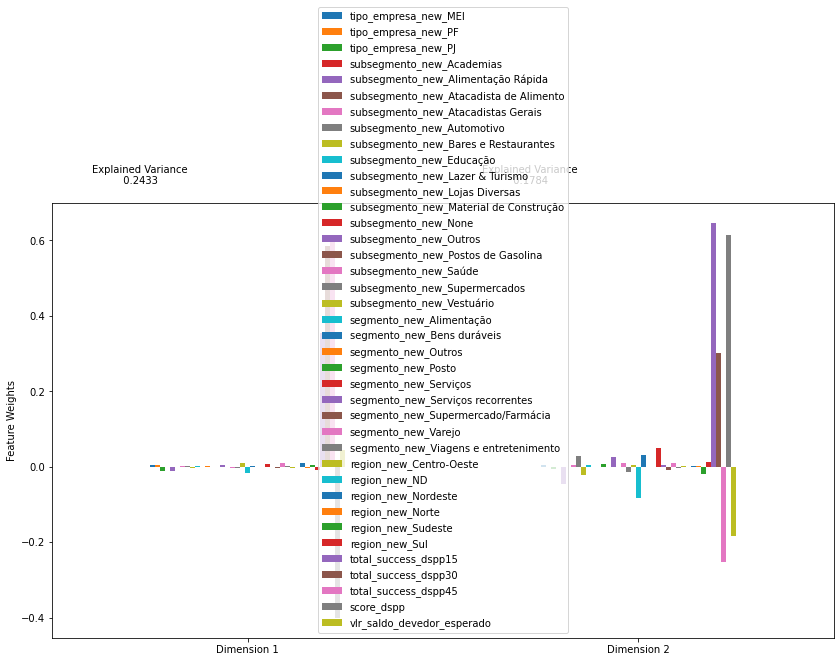

In [50]:
pca_results(df_modeling, pca)

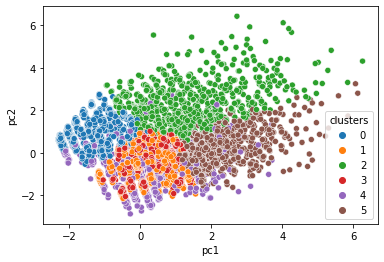

In [51]:
_ = sns.scatterplot(
    x="pc1",
    y="pc2",
    data=orders_to_cluster_components_df,
    hue="clusters",
    palette=sns.color_palette("tab10", 6),
)
plt.show()

In [52]:
orders_to_cluster_components_df

pc1       pc2  clusters
0      0.332670 -1.128580         3
1      0.301823 -1.004213         3
2      0.145476  0.016552         3
3     -1.138830  0.959877         0
4     -2.019738  1.043229         0
...         ...       ...       ...
10115  1.469849 -0.367699         5
10116  1.852627  0.236888         5
10117  0.255266 -0.782590         4
10118  4.470376 -0.549723         5
10119 -2.230646  0.681347         0

[10120 rows x 3 columns]

In [53]:
df_modeling

tipo_empresa_new_MEI  tipo_empresa_new_PF  tipo_empresa_new_PJ  \
0                       0.0                  1.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  1.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  0.0                  1.0   
...                     ...                  ...                  ...   
10115                   1.0                  0.0                  0.0   
10116                   0.0                  0.0                  1.0   
10117                   0.0                  0.0                  1.0   
10118                   0.0                  0.0                  1.0   
10119                   0.0                  0.0                  1.0   

       subsegmento_new_Academias  subsegmento_new_Alimentação Rápida  \
0                            0.0                                 0.0   
1                            0.0                                 0.0   
2                            0.0                                 0.0   
3                            0.0                                 0.0   
4                            1.0                                 0.0   
...                          ...                                 ...   
10115                        0.0                                 0.0   
10116                        0.0                                 0.0   
10117                        0.0                                 1.0   
10118                        0.0                                 1.0   
10119                        0.0                                 0.0   

       subsegmento_new_Atacadista de Alimento  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
10115                                     0.0   
10116                                     0.0   
10117                                     0.0   
10118                                     0.0   
10119                                     0.0   

       subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
10115                                 0.0                         0.0   
10116                                 0.0                         0.0   
10117                                 0.0                         0.0   
10118                                 0.0                         0.0   
10119                                 0.0                         0.0   

       subsegmento_new_Bares e Restaurantes  subsegmento_new_Educação  ...  \
0                                       0.0                       0.0  ...   
1                                       0.0                       0.0  ...   
2                                       0.0                       0.0  ...   
3                                       0.0                       0.0  ...   
4                                       0.0                       0.0  ...   
...                                     ...                       ...  ...   
10115                                   0.0                       0.0  ...   
10116                                   0.0                       0.0  ...   
10117                                   0.0                       0.0  ...   
10118              

In [54]:
# Análise dos clusters
df_modeling["clusters"] = preds
df_modeling

tipo_empresa_new_MEI  tipo_empresa_new_PF  tipo_empresa_new_PJ  \
0                       0.0                  1.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  1.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  0.0                  1.0   
...                     ...                  ...                  ...   
10115                   1.0                  0.0                  0.0   
10116                   0.0                  0.0                  1.0   
10117                   0.0                  0.0                  1.0   
10118                   0.0                  0.0                  1.0   
10119                   0.0                  0.0                  1.0   

       subsegmento_new_Academias  subsegmento_new_Alimentação Rápida  \
0                            0.0                                 0.0   
1                            0.0                                 0.0   
2                            0.0                                 0.0   
3                            0.0                                 0.0   
4                            1.0                                 0.0   
...                          ...                                 ...   
10115                        0.0                                 0.0   
10116                        0.0                                 0.0   
10117                        0.0                                 1.0   
10118                        0.0                                 1.0   
10119                        0.0                                 0.0   

       subsegmento_new_Atacadista de Alimento  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
10115                                     0.0   
10116                                     0.0   
10117                                     0.0   
10118                                     0.0   
10119                                     0.0   

       subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
10115                                 0.0                         0.0   
10116                                 0.0                         0.0   
10117                                 0.0                         0.0   
10118                                 0.0                         0.0   
10119                                 0.0                         0.0   

       subsegmento_new_Bares e Restaurantes  subsegmento_new_Educação  ...  \
0                                       0.0                       0.0  ...   
1                                       0.0                       0.0  ...   
2                                       0.0                       0.0  ...   
3                                       0.0                       0.0  ...   
4                                       0.0                       0.0  ...   
...                                     ...                       ...  ...   
10115                                   0.0                       0.0  ...   
10116                                   0.0                       0.0  ...   
10117                                   0.0                       0.0  ...   
10118              

In [55]:
df_analysis_dsp_no_missing_use_copy["clusters"] = preds
df_analysis_dsp_no_missing_use_copy

total_success_dspp15  total_success_dspp30  total_success_dspp45  \
1                         1                     1                     1   
2                         1                     1                     1   
3                         2                     1                     1   
4                         2                     1                     0   
5                         2                     0                     0   
...                     ...                   ...                   ...   
12194                     3                     1                     2   
12195                     3                     2                     2   
12196                     2                     1                     1   
12199                     4                     3                     4   
12201                     1                     0                     0   

       score_dspp  vlr_saldo_devedor_esperado tipo_empresa_new  \
1        0.000000                    33986.65               PF   
2        0.000000                     4847.02               PF   
3        0.333333                     1861.91               PF   
4        0.750000                    16623.37               PF   
5        1.000000                    23412.69               PJ   
...           ...                         ...              ...   
12194    0.111111                     5445.01              MEI   
12195    0.277778                    12090.53               PJ   
12196    0.333333                   148812.31               PJ   
12199    0.250000                   136579.63               PJ   
12201    1.000000                    32874.80               PJ   

              subsegmento_new          segmento_new region_new  clusters  
1              Lojas Diversas                Varejo    Sudeste         3  
2              Lojas Diversas                Varejo    Sudeste         3  
3      Material de Construção         Bens duráveis   Nordeste         3  
4              Lojas Diversas                Varejo    Sudeste         0  
5                   Academias  Serviços recorrentes    Sudeste         0  
...                       ...                   ...        ...       ...  
12194               Vestuário                Varejo    Sudeste         5  
12195                  Outros              Serviços    Sudeste         5  
12196      Alimentação Rápida           Alimentação   Nordeste         4  
12199      Alimentação Rápida           Alimentação    Sudeste         5  
12201                   Saúde              Serviços      Norte         0  

[10120 rows x 10 columns]

In [56]:
df_analysis_dsp_no_missing_use_copy.groupby(["clusters"])["score_dspp"].agg("mean")

clusters
0    0.853043
1    0.147103
2    0.584330
3    0.139596
4    0.277061
5    0.261130
Name: score_dspp, dtype: float64

In [57]:
df_analysis_dsp_no_missing_use_copy.columns

Index(['total_success_dspp15', 'total_success_dspp30', 'total_success_dspp45',
       'score_dspp', 'vlr_saldo_devedor_esperado', 'tipo_empresa_new',
       'subsegmento_new', 'segmento_new', 'region_new', 'clusters'],
      dtype='object')

In [58]:
df_analysis_dsp_no_missing_use_copy.groupby(["clusters"])[
    ["total_success_dspp15", "total_success_dspp30", "total_success_dspp45"]
].agg("sum")

total_success_dspp15  total_success_dspp30  total_success_dspp45
clusters                                                                  
0                         4441                  1314                    93
1                         2952                  2038                  2290
2                         4993                  2318                   710
3                         3259                  2243                  2457
4                          987                   644                   524
5                         3284                  2633                  2366

In [59]:
df_analysis_dsp_no_missing_use_copy

total_success_dspp15  total_success_dspp30  total_success_dspp45  \
1                         1                     1                     1   
2                         1                     1                     1   
3                         2                     1                     1   
4                         2                     1                     0   
5                         2                     0                     0   
...                     ...                   ...                   ...   
12194                     3                     1                     2   
12195                     3                     2                     2   
12196                     2                     1                     1   
12199                     4                     3                     4   
12201                     1                     0                     0   

       score_dspp  vlr_saldo_devedor_esperado tipo_empresa_new  \
1        0.000000                    33986.65               PF   
2        0.000000                     4847.02               PF   
3        0.333333                     1861.91               PF   
4        0.750000                    16623.37               PF   
5        1.000000                    23412.69               PJ   
...           ...                         ...              ...   
12194    0.111111                     5445.01              MEI   
12195    0.277778                    12090.53               PJ   
12196    0.333333                   148812.31               PJ   
12199    0.250000                   136579.63               PJ   
12201    1.000000                    32874.80               PJ   

              subsegmento_new          segmento_new region_new  clusters  
1              Lojas Diversas                Varejo    Sudeste         3  
2              Lojas Diversas                Varejo    Sudeste         3  
3      Material de Construção         Bens duráveis   Nordeste         3  
4              Lojas Diversas                Varejo    Sudeste         0  
5                   Academias  Serviços recorrentes    Sudeste         0  
...                       ...                   ...        ...       ...  
12194               Vestuário                Varejo    Sudeste         5  
12195                  Outros              Serviços    Sudeste         5  
12196      Alimentação Rápida           Alimentação   Nordeste         4  
12199      Alimentação Rápida           Alimentação    Sudeste         5  
12201                   Saúde              Serviços      Norte         0  

[10120 rows x 10 columns]